In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import json
from tqdm import tqdm_notebook as tqdm
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import os
from BasicModel import BasicModel

In [48]:
filepath = './datasets'
processed_dataset_filepath = './processed_data'
gauge_path = filepath+'/gauge_origin.csv'
radar_path = filepath+'/radar'
station_location_path = processed_dataset_filepath +'/station_location.json'

In [53]:
pd.read_csv(gauge_path)

,Year,Week,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,2017,1,20.8,25.6,9.8,8.6,21.0,13.2,4.8,45.6,...,22.4,27.6,30.0,31.8,50.7,6.2,42.6,31.6,10.0,22.0
1,2017,2,54.0,0.2,14.2,21.4,74.2,2.6,40.6,37.2,...,1.6,45.2,2.4,40.6,49.2,0.0,1.0,50.8,48.0,0.0
2,2017,3,149.6,145.2,92.8,72.6,177.1,35.2,67.2,96.0,...,32.2,128.2,81.4,133.0,157.3,17.8,57.0,169.8,74.6,70.6
3,2017,4,120.0,93.0,124.6,74.6,110.9,117.2,81.8,84.2,...,123.4,78.0,92.8,83.8,87.6,98.2,78.0,77.4,110.0,117.4
4,2017,5,46.0,2.4,16.6,69.0,91.7,13.8,67.8,86.6,...,7.6,54.0,23.0,78.4,98.3,11.4,32.6,37.0,78.6,9.6
5,2017,6,62.0,12.2,35.0,63.8,40.6,51.6,36.2,23.4,...,58.4,30.0,41.0,41.0,41.0,18.4,27.8,51.2,83.6,7.8
6,2017,7,23.6,8.2,20.0,14.8,23.8,9.2,19.0,10.2,...,20.6,10.0,12.2,12.2,12.2,2.4,12.2,11.8,28.2,7.2
7,2017,8,59.4,41.6,41.6,57.8,48.2,38.8,34.8,70.2,...,65.6,63.2,75.4,75.4,64.4,23.4,95.4,52.0,39.0,33.2
8,2017,9,57.2,52.4,52.4,68.0,66.8,99.6,51.4,85.0,...,79.2,101.4,54.4,54.4,51.9,93.6,67.4,70.2,64.6,37.4
9,2017,10,40.4,26.2,24.6,6.8,33.5,25.0,0.0,5.0,...,27.0,55.8,17.0,17.0,13.6,20.4,14.8,59.6,0.2,6.2


In [49]:
with open(station_location_path, 'r') as infile:
    station_location = json.load(infile)

In [50]:
df_gauge = pd.read_csv(gauge_path)

In [51]:
df_gauge_array = df_gauge.values[:, 2:]
print (df_gauge_array.shape)

(52, 50)


In [52]:
np.where(pd.isnull(df_gauge))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
all_radar_path_list = sorted(os.listdir(radar_path))

In [ ]:
df_gauge.head()
df_gauge['Week'] = df_gauge['Week'].astype(str)

In [ ]:
train_week = []
list_dfs = []
for filename in tqdm(all_radar_path_list):
    week = filename.split('.')[0][-2:]
    train_week.append(str(week))
    full_radar_path = os.path.join(radar_path, filename)
    df_radar = pd.read_csv(full_radar_path)
    df_radar['latlong'] = df_radar['lat'] * 1000 + df_radar['long']
    list_dfs.append(df_radar)

In [ ]:
df_result = pd.DataFrame(columns = column_names)
for station in tqdm(range(df_gauge_array.shape[1])):
    for week in train_week:
        chosen_latlong = int(station_location[str(station)]['latlong'])
        y = df_gauge[df_gauge['Week'] == str(week)][str(station)].values[0]
        week_index = train_week.index(week)
        df_radar = list_dfs[week_index]
        x = df_radar[df_radar['latlong'] == chosen_latlong].values[:, 2:36][0]
        df_row = pd.DataFrame([np.concatenate(([station], [week], x, [y]))], columns = column_names)
        df_result = pd.concat([df_result, df_row])      

In [ ]:
import numpy as np
np.sqrt(10+2)

In [ ]:
df_result.to_csv('./preprocessed_data/train.csv', index=False)

In [16]:
train_path = processed_dataset_filepath+'/train.csv'

In [17]:
df_result = pd.read_csv(train_path)
del df_result['Unnamed: 0']

In [18]:
df_result.head()

,station,week,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,y
0,0,13,1985,0,3,0,1,1,0,4,...,0,0,0,0,0,0,0,0,0,36.8
1,0,15,1993,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,43.8
2,0,16,1945,1,1,0,3,4,4,2,...,0,0,0,0,0,0,0,0,0,98.8
3,0,17,1976,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,100.2
4,0,18,2005,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2.0


In [19]:
X_array = df_result.values[:,2:36].astype(float)
y_array = df_result.values[:, 36].astype(float)

In [38]:
basicmodel = BasicModel()

In [39]:
basicmodel.loss(0.079, 0.228, X_array, y_array)

1132.3917939806026

In [40]:
basicmodel.predict(X_array)

array([ 17.26321388,  16.93263449,  25.69617016, ...,  13.73577543,
        38.24685034,  22.8672423 ])

In [41]:
basicmodel.fit(X_array, y_array, learning_rate=0.01, beta_1 = 0.90, beta_2 = 0.999, max_iter=10000)

  0%|          | 14/9999 [00:00<01:12, 138.33it/s]

Initial_loss: 1132.39179398
Shape of x: (1550, 34)
Shape of y: (1550,)


100%|██████████| 9999/9999 [01:34<00:00, 105.28it/s]

A: 0.153110232791
B: 0.206796717249
Loss: 832.137435881


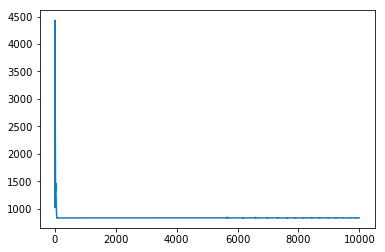

In [44]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(basicmodel.loss)), basicmodel.loss)
plt.show()

In [45]:
basicmodel.predict(X_array)

array([ 31.26598069,  30.75878933,  42.49131309, ...,  26.42557197,
        55.80726695,  36.66099716])

In [46]:
y_array

array([  36.8,   43.8,   98.8, ...,    2.4,  159. ,   34.8])

In [1]:
import geocoder

In [2]:
g = geocoder.google([1.4705, 103.7452], method='reverse')

In [5]:
 from geopy.geocoders import Nominatim

In [6]:
geolocator = Nominatim()

In [7]:
location = geolocator.reverse("52.509669, 13.376294")

In [9]:
location.address

u'Backwerk, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland'